# Purpose:
To understand how many users & what percentage of users watch over 20,000 pages on English & German Wikipedia.[T245852](https://phabricator.wikimedia.org/T245852)


# Data timeframe:
User watchlist data at the time point of 2020-02-18 on enwiki and dewiki

# Summary:
- How many users watch over 20,000 pages on English Wikipedia?<br />
    __345__
- What percentage of users watch over 20,000 pages on English Wikipedia?<br />
    __0.0017%__
- How many users watch over 20,000 pages on German Wikipedia?<br />
    __90__
- What percentage of users watch over 20,000 pages on German Wikipedia?<br />
    __0.005%__
- Among the users who watch over 20,000 pages, some of top watchlist ids are bot user.

In [40]:
import pandas as pd
from wmfdata import mariadb

In [2]:
import wmfdata
wmfdata.utils.insert_code_toggle()

# English Wikipedia

In [3]:
watchlist_count_query = '''

SELECT wl_user, COUNT(DISTINCT wl_title) AS watchlist_count, 
(CASE WHEN ug.ug_group = 'bot' THEN 1 ELSE 0 END) AS bot 
FROM watchlist AS wl LEFT JOIN user_groups AS ug ON ug.ug_user=wl.wl_user  
GROUP BY wl_user 
ORDER BY watchlist_count DESC

'''

In [4]:
df_watchlist_count_enwiki=mariadb.run(watchlist_count_query, 'enwiki')

In [5]:
df_watchlist_count_enwiki.head(10)

,wl_user,watchlist_count,bot
0,13286072,1744128,1
1,14218903,577817,0
2,433328,517328,0
3,4936590,292083,1
4,18779361,224474,0
5,28207637,218296,0
6,4048622,213735,1
7,506179,208479,0
8,10996774,199092,1
9,149211,187664,0


In [6]:
df_watchlist_count_enwiki[df_watchlist_count_enwiki['watchlist_count'] >= 20000].describe()

,wl_user,watchlist_count,bot
count,3.450000e+02,3.450000e+02,345.000000
mean,9.076888e+06,5.502067e+04,0.055072
std,9.904756e+06,1.063538e+05,0.228453
min,7.600000e+01,2.009100e+04,0.000000
25%,5.450270e+05,2.432500e+04,0.000000
50%,5.724179e+06,3.318000e+04,0.000000
75%,1.565014e+07,5.273100e+04,0.000000
max,3.787761e+07,1.744128e+06,1.000000


In [7]:
df_watchlist_count_enwiki.count()

wl_user            20104630
watchlist_count    20104630
bot                20104630
dtype: int64

### How many users watch over 20,000 pages on English Wikipedia?

In [8]:
df_watchlist_count_enwiki[df_watchlist_count_enwiki['watchlist_count'] >= 20000].count()

wl_user            345
watchlist_count    345
bot                345
dtype: int64

### What percentage of users watch over 20,000 pages on English Wikipedia?

In [9]:
df_watchlist_count_enwiki[df_watchlist_count_enwiki['watchlist_count'] >= 20000].count()/df_watchlist_count_enwiki.count()

wl_user            0.000017
watchlist_count    0.000017
bot                0.000017
dtype: float64

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

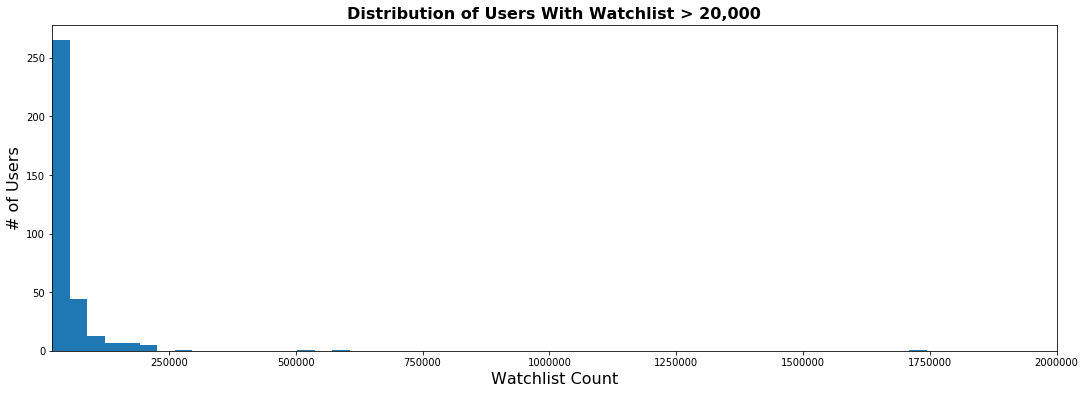

In [23]:
plt.figure(figsize=(18, 6))
plt.xlim(20000,2000000)
plt.hist(df_watchlist_count_enwiki[df_watchlist_count_enwiki['watchlist_count']>= 20000]['watchlist_count'], bins=50, histtype='bar')
plt.title('Distribution of Users With Watchlist > 20,000',fontweight="bold",fontsize = 16)
plt.ylabel('# of Users',fontsize = 16)
plt.xlabel('Watchlist Count',fontsize = 16)
plt.show()

### Any whatchlist behavior difference between bot and non-bot user?

In [10]:
df_watchlist_count_enwiki[df_watchlist_count_enwiki['bot'] == 1].describe()

,wl_user,watchlist_count,bot
count,2.420000e+02,2.420000e+02,242.0
mean,1.726334e+07,1.634886e+04,1.0
std,1.083950e+07,1.168464e+05,0.0
min,8.292800e+04,1.000000e+00,1.0
25%,8.671527e+06,2.000000e+00,1.0
50%,1.627531e+07,1.100000e+01,1.0
75%,2.688366e+07,4.305000e+02,1.0
max,3.820076e+07,1.744128e+06,1.0


In [11]:
df_watchlist_count_enwiki[df_watchlist_count_enwiki['bot'] == 0].describe()

,wl_user,watchlist_count,bot
count,2.010439e+07,2.010439e+07,20104388.0
mean,2.596565e+07,5.118400e+00,0.0
std,9.873706e+06,3.030764e+02,0.0
min,0.000000e+00,1.000000e+00,0.0
25%,2.186345e+07,1.000000e+00,0.0
50%,2.833480e+07,1.000000e+00,0.0
75%,3.346845e+07,1.000000e+00,0.0
max,3.858258e+07,5.778170e+05,0.0


/home/jiawang/venv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


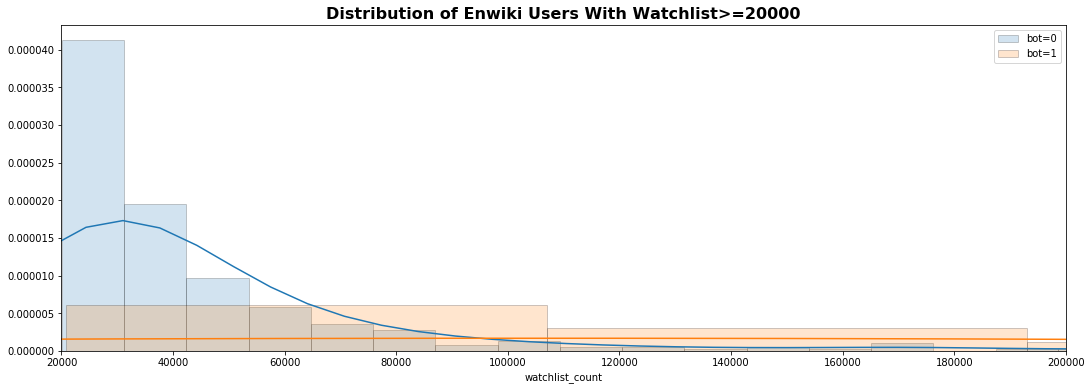

In [29]:
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
plt.figure(figsize=(18, 6))
plt.xlim(20000, 200000)

plt.title('Distribution of Enwiki Users With Watchlist>=20000',fontweight="bold",fontsize = 16)

plt.savefig("distribution_enwiki_20000.png")

sns.distplot(df_watchlist_count_enwiki[(df_watchlist_count_enwiki['bot'] == 0)&(df_watchlist_count_enwiki['watchlist_count']>= 20000)]['watchlist_count'], label='bot=0', 
              hist_kws=hist_kws)
sns.distplot(df_watchlist_count_enwiki[(df_watchlist_count_enwiki['bot'] == 1)&(df_watchlist_count_enwiki['watchlist_count']>= 20000)]['watchlist_count'], label='bot=1', 
              hist_kws=hist_kws)
plt.legend()
plt.show()


# German Wikipedia

In [30]:
df_watchlist_count_dewiki=mariadb.run(watchlist_count_query, 'dewiki')
df_watchlist_count_dewiki.head(10)

,wl_user,watchlist_count,bot
0,594711,291229,0
1,1648354,192342,0
2,75157,145457,0
3,766512,137295,1
4,417536,118967,0
5,1523946,103380,1
6,29738,94400,0
7,560031,91617,0
8,45933,89317,0
9,2262393,87902,0


In [31]:
df_watchlist_count_dewiki.describe()

,wl_user,watchlist_count,bot
count,1.813969e+06,1.813969e+06,1.813969e+06
mean,2.214146e+06,1.216382e+01,5.733284e-05
std,9.511365e+05,4.707661e+02,7.571630e-03
min,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.810407e+06,1.000000e+00,0.000000e+00
50%,2.492151e+06,1.000000e+00,0.000000e+00
75%,2.950180e+06,1.000000e+00,0.000000e+00
max,3.413511e+06,2.912290e+05,1.000000e+00


### How many users watch over 20,000 pages on German Wikipedia?


In [32]:
df_watchlist_count_dewiki[df_watchlist_count_dewiki['watchlist_count']>=20000].count(0)

wl_user            90
watchlist_count    90
bot                90
dtype: int64

In [36]:
df_watchlist_count_dewiki.count(0)

wl_user            1813969
watchlist_count    1813969
bot                1813969
dtype: int64

### What percentage of users watch over 20,000 pages on German Wikipedia?


In [33]:
df_watchlist_count_dewiki[df_watchlist_count_dewiki['watchlist_count']>=20000].count(0)/df_watchlist_count_dewiki.count(0)

wl_user            0.00005
watchlist_count    0.00005
bot                0.00005
dtype: float64

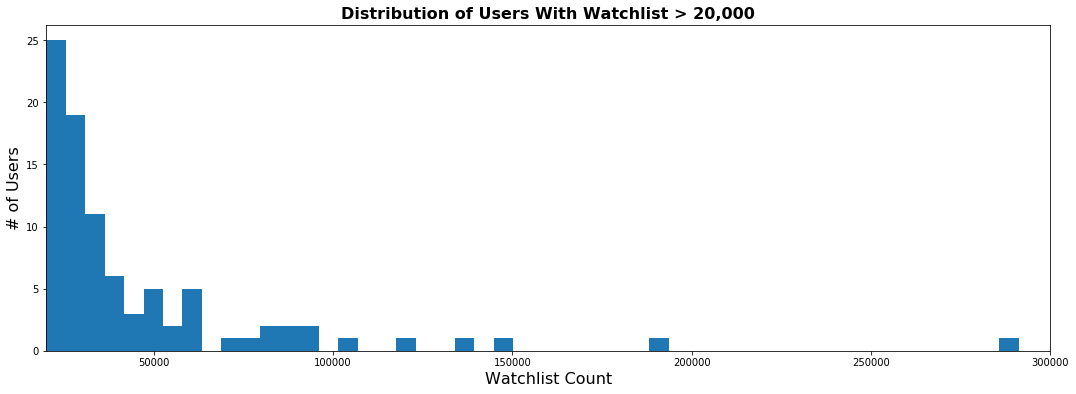

In [38]:
plt.figure(figsize=(18, 6))
plt.xlim(20000,300000)
plt.hist(df_watchlist_count_dewiki[df_watchlist_count_dewiki['watchlist_count']>= 20000]['watchlist_count'], bins=50, histtype='bar')
plt.title('Distribution of Users With Watchlist > 20,000',fontweight="bold",fontsize = 16)
plt.ylabel('# of Users',fontsize = 16)
plt.xlabel('Watchlist Count',fontsize = 16)
plt.show()

### Any whatchlist behavior difference between bot and non-bot user?

In [34]:
df_watchlist_count_dewiki[df_watchlist_count_dewiki['bot']==1].describe()

,wl_user,watchlist_count,bot
count,1.040000e+02,104.000000,104.0
mean,7.320282e+05,2807.788462,1.0
std,7.912215e+05,17117.483818,0.0
min,1.655000e+03,1.000000,1.0
25%,2.648085e+05,1.000000,1.0
50%,4.367595e+05,2.000000,1.0
75%,7.999678e+05,11.500000,1.0
max,3.321162e+06,137295.000000,1.0


In [35]:
df_watchlist_count_dewiki[df_watchlist_count_dewiki['bot']==0].describe()

,wl_user,watchlist_count,bot
count,1.813865e+06,1.813865e+06,1813865.0
mean,2.214231e+06,1.200353e+01,0.0
std,9.510788e+05,4.522686e+02,0.0
min,0.000000e+00,1.000000e+00,0.0
25%,1.810501e+06,1.000000e+00,0.0
50%,2.492196e+06,1.000000e+00,0.0
75%,2.950201e+06,1.000000e+00,0.0
max,3.413511e+06,2.912290e+05,0.0


/home/jiawang/venv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


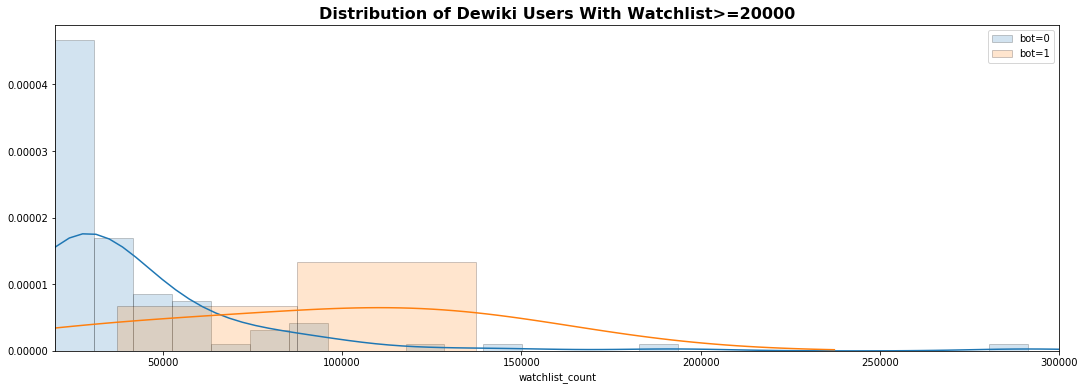

In [39]:
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
plt.figure(figsize=(18, 6))
plt.xlim(20000,300000)

plt.title('Distribution of Dewiki Users With Watchlist>=20000',fontweight="bold",fontsize = 16)

plt.savefig("distribution_dewiki_20000.png")

sns.distplot(df_watchlist_count_dewiki[(df_watchlist_count_dewiki['bot'] == 0)&(df_watchlist_count_dewiki['watchlist_count']>= 20000)]['watchlist_count'], label='bot=0', 
              hist_kws=hist_kws)
sns.distplot(df_watchlist_count_dewiki[(df_watchlist_count_dewiki['bot'] == 1)&(df_watchlist_count_dewiki['watchlist_count']>= 20000)]['watchlist_count'], label='bot=1', 
              hist_kws=hist_kws)
plt.legend()
plt.show()